# Task 1

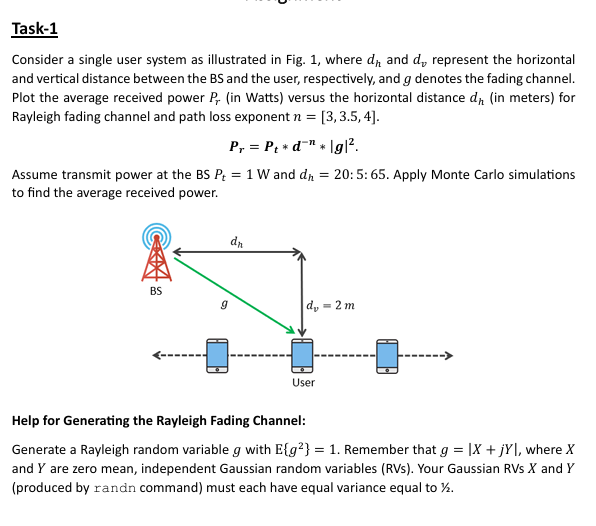

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [22]:
def get_rayleigh_fading(size):
  X = np.random.normal(0, np.sqrt(0.5), size)
  Y = np.random.normal(0, np.sqrt(0.5), size)

  return np.sqrt(X**2 + Y**2)

In [23]:
iterations = 10**5 # number of simulations to run
n_array = np.array([3, 3.5, 4]) # path loss exponents
dh_array = np.arange(20,65, 5) # an array holding all horizontal distances of each device (confusion)
dv = 2 # vertical distance
pt = 1 # transmit power from BS

calculating for n = 4.0: 100%|██████████| 9/9 [00:00<00:00, 114.21it/s]


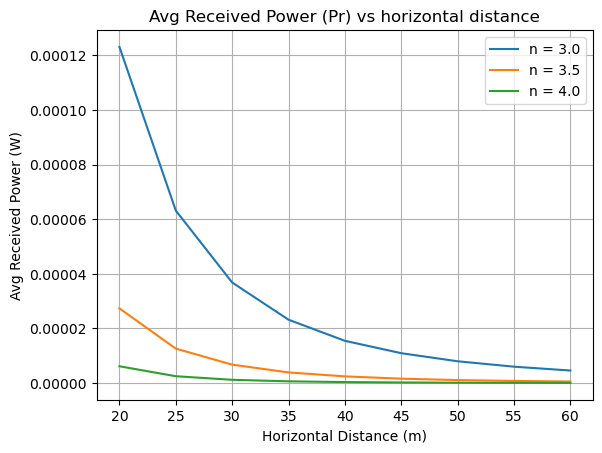

In [24]:
for n in n_array:
  avg_pr = []
  for dh in tqdm(dh_array, desc=f"calculating for n = {n}"):
    g = get_rayleigh_fading(iterations)
    d = np.sqrt(dh**2 + dv**2)
    pr = pt * d ** (-n) * g**2

    avg_pr.append(np.mean(pr))

  # plot this
  plt.plot(dh_array, avg_pr, label=f"n = {n}")


plt.title("Avg Received Power (Pr) vs horizontal distance")
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Avg Received Power (W)")
plt.legend()
plt.grid()
plt.show()

# Task 2

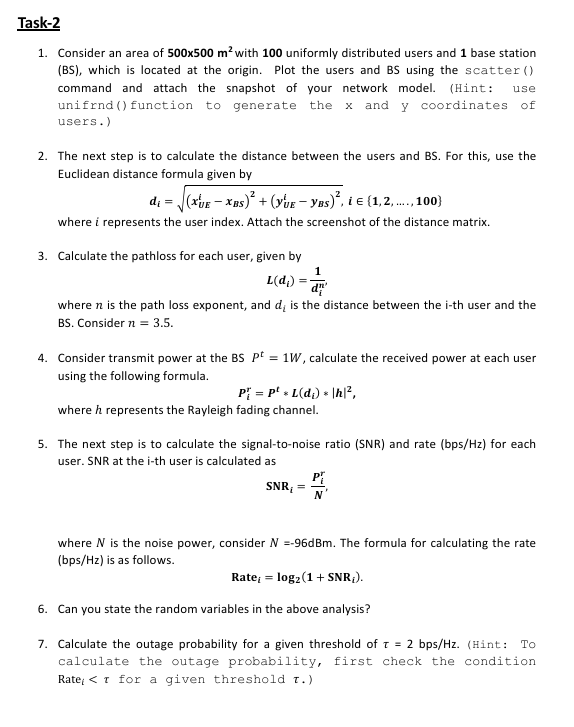

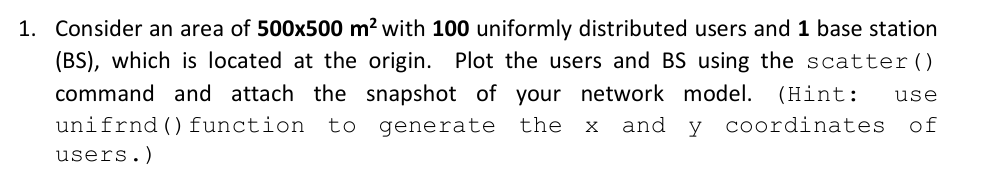

In [25]:
num_users = 100
area = 500

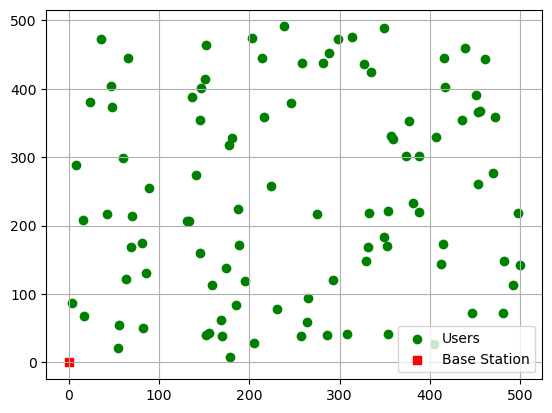

In [26]:
users_x = np.random.uniform(0, area, num_users)
users_y = np.random.uniform(0, area, num_users)

bs_x = 0
bs_y = 0

plt.scatter(users_x, users_y, label="Users", color="green")
plt.scatter(bs_x, bs_y, label="Base Station", color="red", marker='s')
plt.legend()
plt.grid()
plt.show()


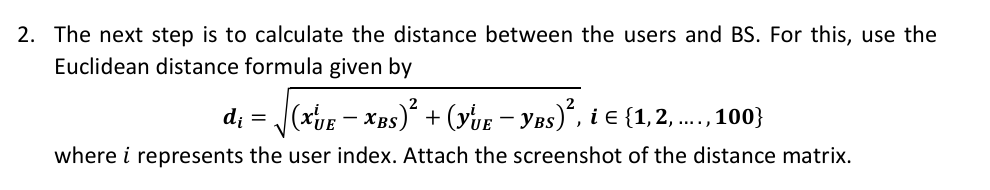

(array([4., 1., 1., 4., 6., 7., 5., 5., 5., 1., 7., 7., 4., 8., 8., 9., 6.,
        4., 6., 2.]),
 array([ 58.62789096,  87.68279975, 116.73770854, 145.79261733,
        174.84752612, 203.90243491, 232.95734371, 262.0122525 ,
        291.06716129, 320.12207008, 349.17697887, 378.23188766,
        407.28679645, 436.34170524, 465.39661404, 494.45152283,
        523.50643162, 552.56134041, 581.6162492 , 610.67115799,
        639.72606678]),
 <BarContainer object of 20 artists>)

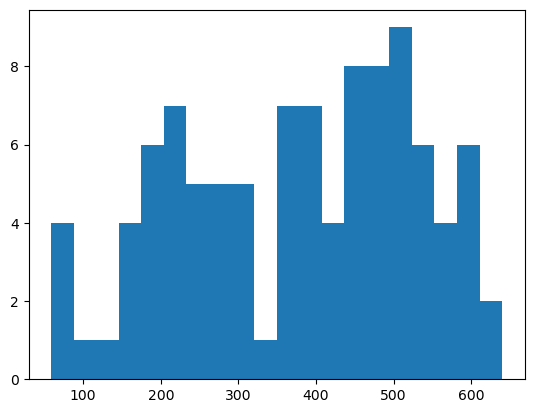

In [27]:
d = np.sqrt((users_x-bs_x)**2 + (users_y-bs_y)**2)
plt.hist(d, bins=20)

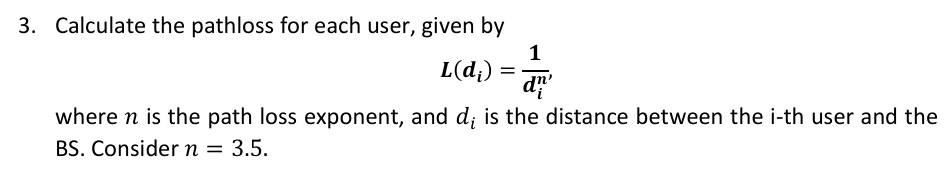

(array([95.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.51015260e-10, 3.25479443e-08, 6.49448734e-08, 9.73418025e-08,
        1.29738732e-07, 1.62135661e-07, 1.94532590e-07, 2.26929519e-07,
        2.59326448e-07, 2.91723377e-07, 3.24120306e-07, 3.56517235e-07,
        3.88914164e-07, 4.21311093e-07, 4.53708022e-07, 4.86104951e-07,
        5.18501880e-07, 5.50898809e-07, 5.83295738e-07, 6.15692667e-07,
        6.48089597e-07]),
 <BarContainer object of 20 artists>)

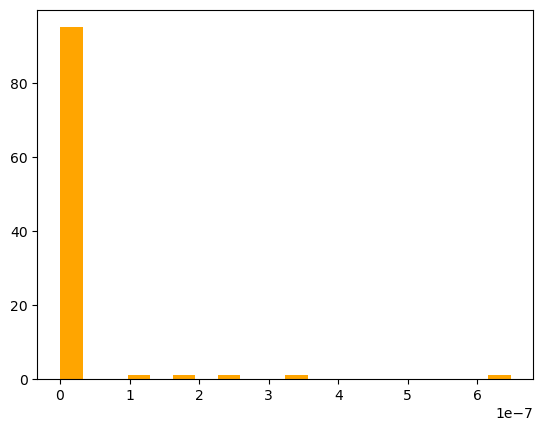

In [28]:
n = 3.5 # path loss exponent
path_loss =  d**(-n)

plt.hist(path_loss, bins=20, color="orange")

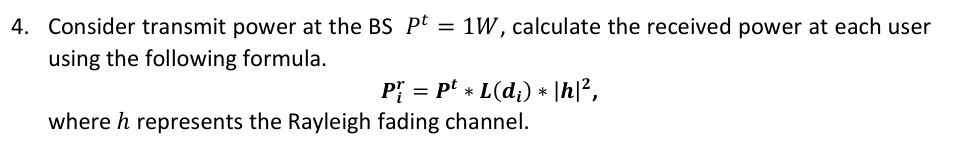

(array([97.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([2.00422483e-12, 4.44428398e-08, 8.88836753e-08, 1.33324511e-07,
        1.77765346e-07, 2.22206182e-07, 2.66647017e-07, 3.11087853e-07,
        3.55528688e-07, 3.99969524e-07, 4.44410360e-07, 4.88851195e-07,
        5.33292031e-07, 5.77732866e-07, 6.22173702e-07, 6.66614537e-07,
        7.11055373e-07, 7.55496208e-07, 7.99937044e-07, 8.44377879e-07,
        8.88818715e-07]),
 <BarContainer object of 20 artists>)

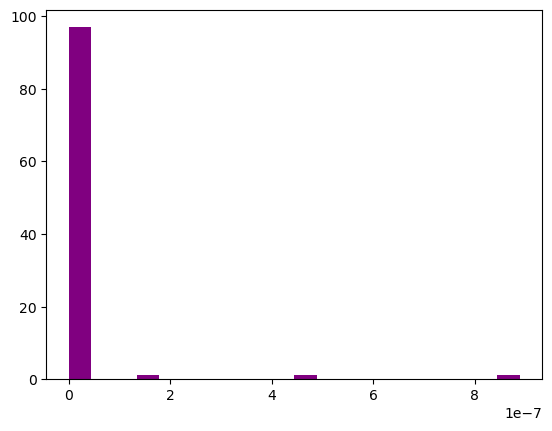

In [30]:
# recieved power

pt = 1 # transmit power from BS

h = get_rayleigh_fading(num_users)

pr = pt * path_loss * h**2

plt.hist(pr, bins=20, color="purple")

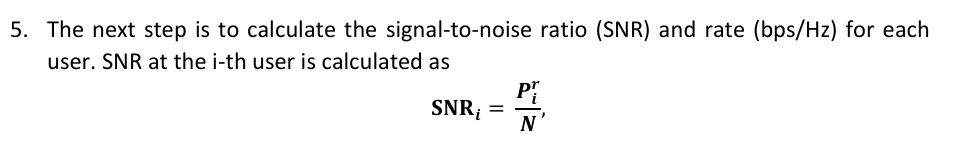

(array([97.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([7.97896277e+00, 1.76930132e+05, 3.53852285e+05, 5.30774438e+05,
        7.07696591e+05, 8.84618743e+05, 1.06154090e+06, 1.23846305e+06,
        1.41538520e+06, 1.59230736e+06, 1.76922951e+06, 1.94615166e+06,
        2.12307381e+06, 2.29999597e+06, 2.47691812e+06, 2.65384027e+06,
        2.83076243e+06, 3.00768458e+06, 3.18460673e+06, 3.36152888e+06,
        3.53845104e+06]),
 <BarContainer object of 20 artists>)

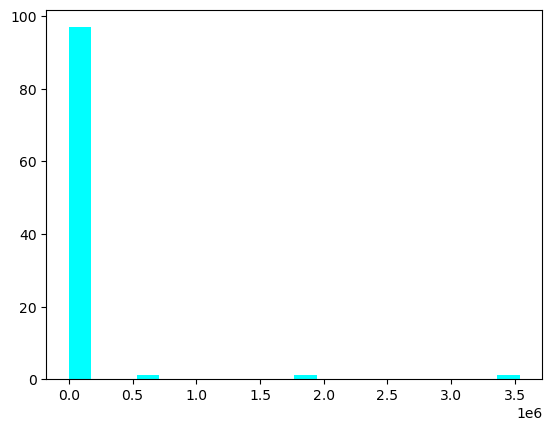

In [ ]:
# SNR
N_dbm = -96 # in dbm
N = 10**(N_dbm/10) / 1000 # in W

SNR = pr / N

plt.hist(SNR, bins=20, color="cyan")

(array([ 1.,  1.,  2.,  2.,  2.,  4., 11., 20.,  9., 17.,  7.,  5.,  4.,
         5.,  7.,  0.,  0.,  1.,  1.,  1.]),
 array([ 3.1665488 ,  4.0959557 ,  5.02536261,  5.95476952,  6.88417642,
         7.81358333,  8.74299024,  9.67239715, 10.60180405, 11.53121096,
        12.46061787, 13.39002477, 14.31943168, 15.24883859, 16.17824549,
        17.1076524 , 18.03705931, 18.96646621, 19.89587312, 20.82528003,
        21.75468693]),
 <BarContainer object of 20 artists>)

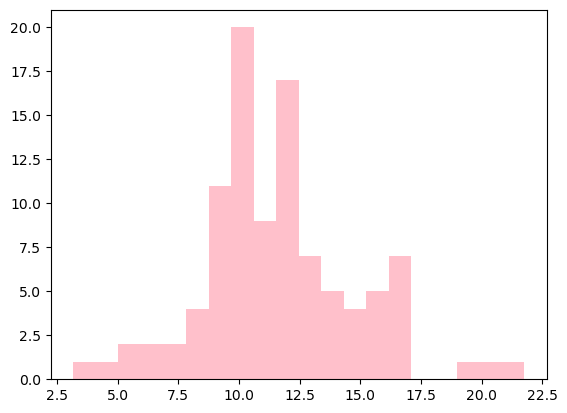

In [39]:
rate = np.log2(1 + SNR) #

plt.hist(rate, bins=20, color="pink")

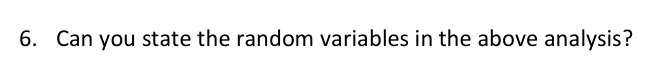

random variables are rayleigh fading h and coords of users

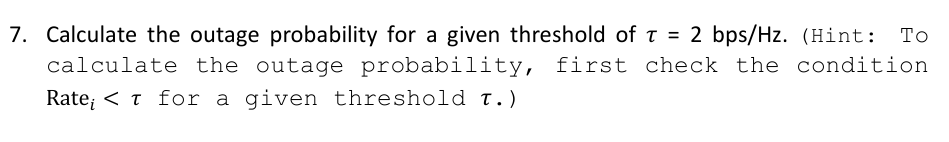

In [ ]:
tau = 2 # 2 bps/Hz

outage_prob = np.sum(rate< tau) / num_users
print(f"Outage probility : {outage_prob:.2f}")

Outage probility : 0.00


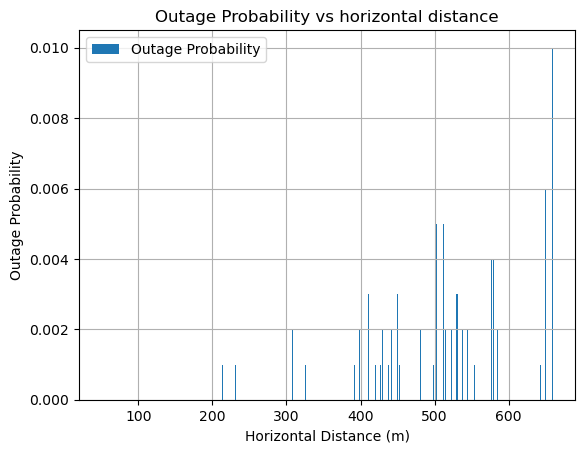

In [58]:
iterations = 1000

num_users = 100
area = 500
pt = 1
N_dbm = -96 # in dbm
N = 10**(N_dbm/10) / 1000 # in W

tau = 2 # 2 bps/Hz


rates = []

users_x = np.random.uniform(0, area, num_users)
users_y = np.random.uniform(0, area, num_users)
bs_x = 0
bs_y = 0
d = np.sqrt((users_x-bs_x)**2 + (users_y-bs_y)**2)
path_loss =  d**(-n)

for i in range(iterations):


    h = get_rayleigh_fading(num_users)

    pr = pt * path_loss * h**2

    snr = pr / N

    rate = np.log2(1 + snr)

    rates.append(rate)


rates = np.array(rates)
outage_prob = np.mean(rates < tau ,  axis=0)

# plot graph between outage probability and distance
plt.bar(d, outage_prob, label="Outage Probability")
plt.title("Outage Probability vs horizontal distance")
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Outage Probability")
plt.legend()
plt.grid()



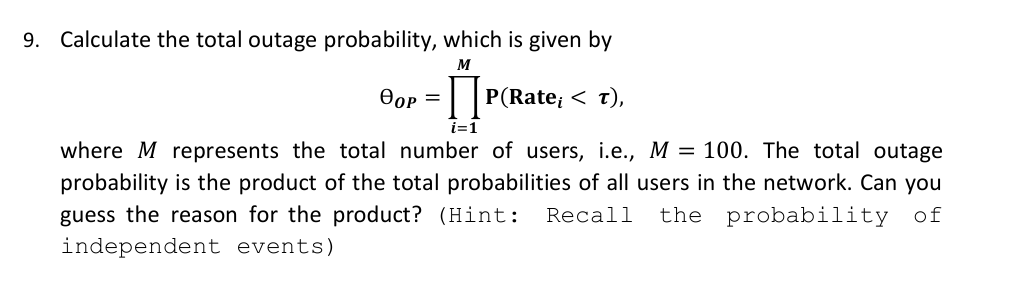

In [59]:
total_outage_prob = np.product(outage_prob)
print(f"Total Outage Probability: {total_outage_prob:.2f}")

Total Outage Probability: 0.00


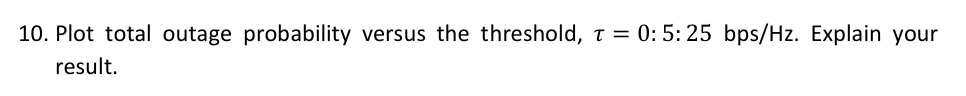

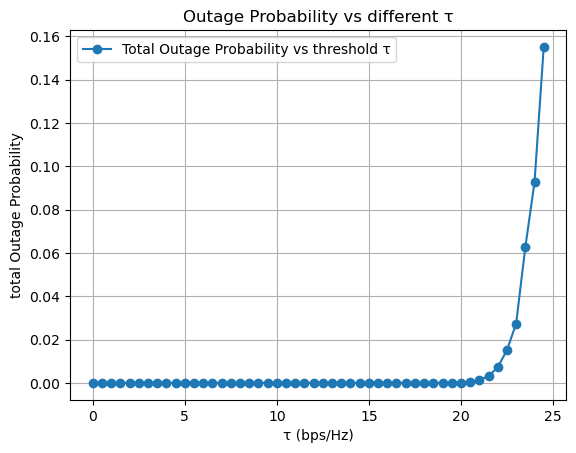

In [67]:
iterations = 1000

num_users = 100
area = 500
pt = 1
N_dbm = -96 # in dbm
N = 10**(N_dbm/10) / 1000 # in W

tau_range = np.arange(0,25,0.5)# 2 bps/Hz




users_x = np.random.uniform(0, area, num_users)
users_y = np.random.uniform(0, area, num_users)
bs_x = 0
bs_y = 0
d = np.sqrt((users_x-bs_x)**2 + (users_y-bs_y)**2)
path_loss =  d**(-n)

total_outage_probabilities = []
for tau in tau_range:

    rates = []

    for i in range(iterations):


        h = get_rayleigh_fading(num_users)

        pr = pt * path_loss * h**2

        snr = pr / N

        rate = np.log2(1 + snr)

        rates.append(rate)


    rates = np.array(rates)
    outage_prob = np.mean(rates < tau ,  axis=0)

    total_outage_prob = np.product(outage_prob)
    total_outage_probabilities.append(total_outage_prob)



# plot graph between outage probability and distance
plt.plot(tau_range, total_outage_probabilities, label="Total Outage Probability vs threshold τ", marker='o')
plt.title("Outage Probability vs different τ")
plt.xlabel("τ (bps/Hz)")
plt.ylabel("total Outage Probability")
plt.legend()
plt.grid()



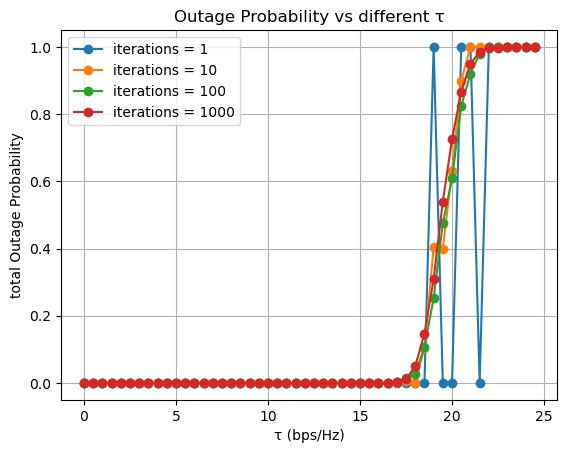

In [71]:
iterations_range = [1,10,100,1000] # number of simulations to run

num_users = 100
area = 500
pt = 1
N_dbm = -96 # in dbm
N = 10**(N_dbm/10) / 1000 # in W

tau_range = np.arange(0,25,0.5)# 2 bps/Hz




users_x = np.random.uniform(0, area, num_users)
users_y = np.random.uniform(0, area, num_users)
bs_x = 0
bs_y = 0
d = np.sqrt((users_x-bs_x)**2 + (users_y-bs_y)**2)
path_loss =  d**(-n)


for iterations in iterations_range:
    total_outage_probabilities = []
    for tau in tau_range:

        rates = []

        for i in range(iterations):


            h = get_rayleigh_fading(num_users)

            pr = pt * path_loss * h**2

            snr = pr / N

            rate = np.log2(1 + snr)

            rates.append(rate)


        rates = np.array(rates)
        outage_prob = np.mean(rates < tau ,  axis=0)

        total_outage_prob = np.product(outage_prob)
        total_outage_probabilities.append(total_outage_prob)



    # plot graph between outage probability and distance
    plt.plot(tau_range, total_outage_probabilities, label=f"iterations = {iterations}", marker='o' )

plt.title("Outage Probability vs different τ")
plt.xlabel("τ (bps/Hz)")
plt.ylabel("total Outage Probability")
plt.legend()
plt.grid()

